Name: Vishal Vijay Devadiga

Roll Number: CS21BTECH11061

# Coupled Oscillations

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Sat Nov 19 00:22:50 2022

@author: g.tec
"""

# Imports
# IMPORTANT: I had a newer python version, in which scipy has depreciated linspace (not sure), thus used numpy
# from scipy import linspace
from numpy import linspace
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import numpy as np
import scipy


The following is a model of Vanderpol oscillator, which is a best known model of self-sustained oscillator, coupled to sinusoidal external force.

Vanderpol oscillator:

- $y=dxdt$
- $dydt= mu*(1-x^2)*y -((w_0^2)*x)$

sinusoidal external force: $E*np.sin(v*t)$

Vanderpol oscillator coupled to external force

- $y=dxdt$
- $dydt=mu*(1-x^2)*y -((w_0^2)*x)+ (E*np.sin(v*t))$

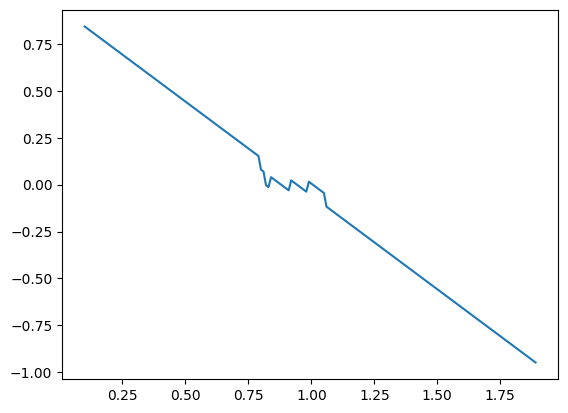

In [2]:
# model of coupled vanderpol oscillator
def vdp2(t,z):
    x,y=z
    return [y, mu*(1-x**2)*y -((w0**2)*x)+ (E*np.sin(v*t))]

delta=np.arange(-0.9,0.9,0.01) # detuning
n=len(delta)
Vs=np.zeros(n)
freqdiff=np.zeros(n)
freqratio=np.zeros(n)

for i in np.arange(n):
    deltai=delta[i]
    a,b=0,100
    E=0.3  # Amplitude of the external periodic force
    w0=1 # natural frequency of the vanderpol oscillator in rad/sec
    mu=1
    v=w0+deltai # frequency of the external periodic force in rad/sec
    t=np.arange(a,b,0.1)
    sol=solve_ivp(vdp2,[a,b],[0,0],t_eval=t)

    # plt.figure()
    # plt.plot(t,sol.y[0])

    sig1=sol.y[0]
    #sig1=E*np.sin(v*t)
    N1=len(sig1)
    T=0.1
    fft1=scipy.fft.fft(sig1)
    fftx1=(2/N1) * np.abs(fft1[0:N1//2])
    freq1=scipy.fft.fftfreq(N1,T)[:N1//2]
    ind1=np.where(fftx1==max(fftx1))[0][0]
    finfreq1=2*np.pi*freq1[ind1] # frequency of the vanderpol oscillator in coupled state in rad/sec
    freq_diff=finfreq1-v
    Vs[i]=v
    freqdiff[i]=freq_diff
    freqratio[i]= finfreq1/v

plt.figure()
plt.plot(Vs,freqdiff)


# Task 1 

Tinker the with detuning of frequencies (delta) and the amplitude of external force (E) to explore the synchronization between both the oscillator systems. Determine the synchronization regime for the frequencies of oscillators when the amplitude of external force E=0.6

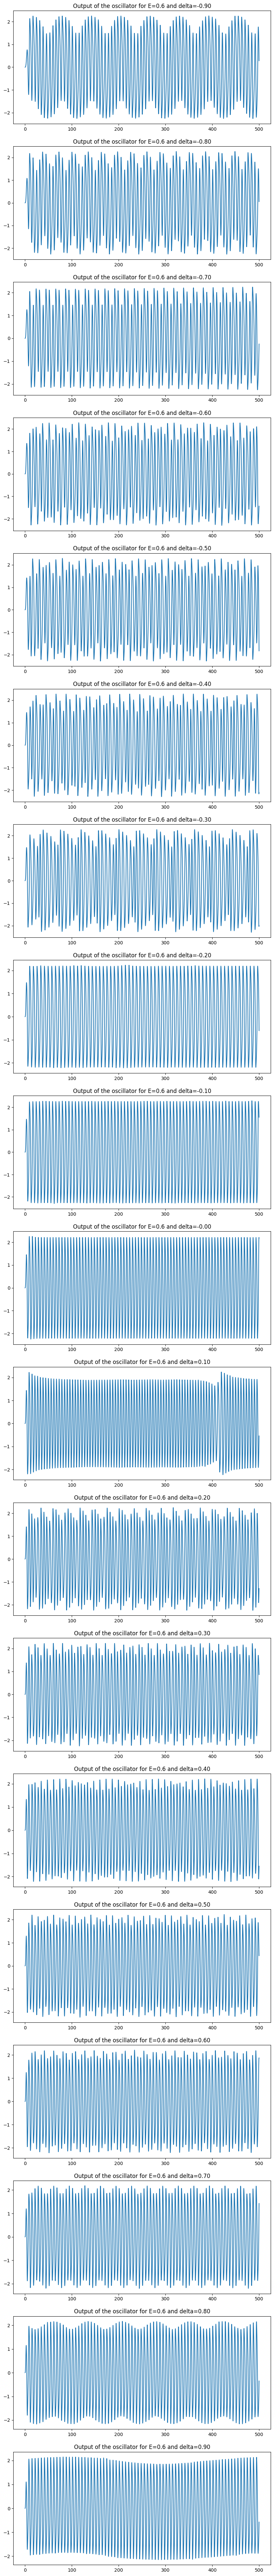

In [3]:
# Task 1

E = 0.6  # Amplitude of the external periodic force
delta = np.arange(-0.9, 1, 0.1)  # detuning
n = len(delta)

fig, ax = plt.subplots(n, 1, figsize=(10, 100))

for i in np.arange(n):
    delta1 = delta[i]
    a, b = 0, 500
    w0 = 1  # natural frequency of the vanderpol oscillator in rad/sec
    mu = 1
    v = w0 + delta1  # frequency of the external periodic force in rad/sec
    t = np.arange(a, b, 0.1)
    sol = solve_ivp(vdp2, [a, b], [0, 0], t_eval=t)
    delta1_num = "{:.2f}".format(delta1)
    ax[i].plot(t, sol.y[0])
    ax[i].set_title(f'Output of the oscillator for E={E} and delta={delta1_num}')
plt.show()

# Task 2

In [4]:
E_values = np.arange(0.1, 1.0, 0.1)  # Different amplitudes of the external periodic force
delta = np.arange(-0.9, 0.90, 0.01)  # detuning
n = len(delta)
Vs = np.zeros(n)
freqdiff = np.zeros(n)
freqratio = np.zeros(n)

Show graphically the need for greater external forcing to compensate for larger detuning between oscillators by Plotting the synchronization region for various amplitudes of external force and determine the Arnold's tongue

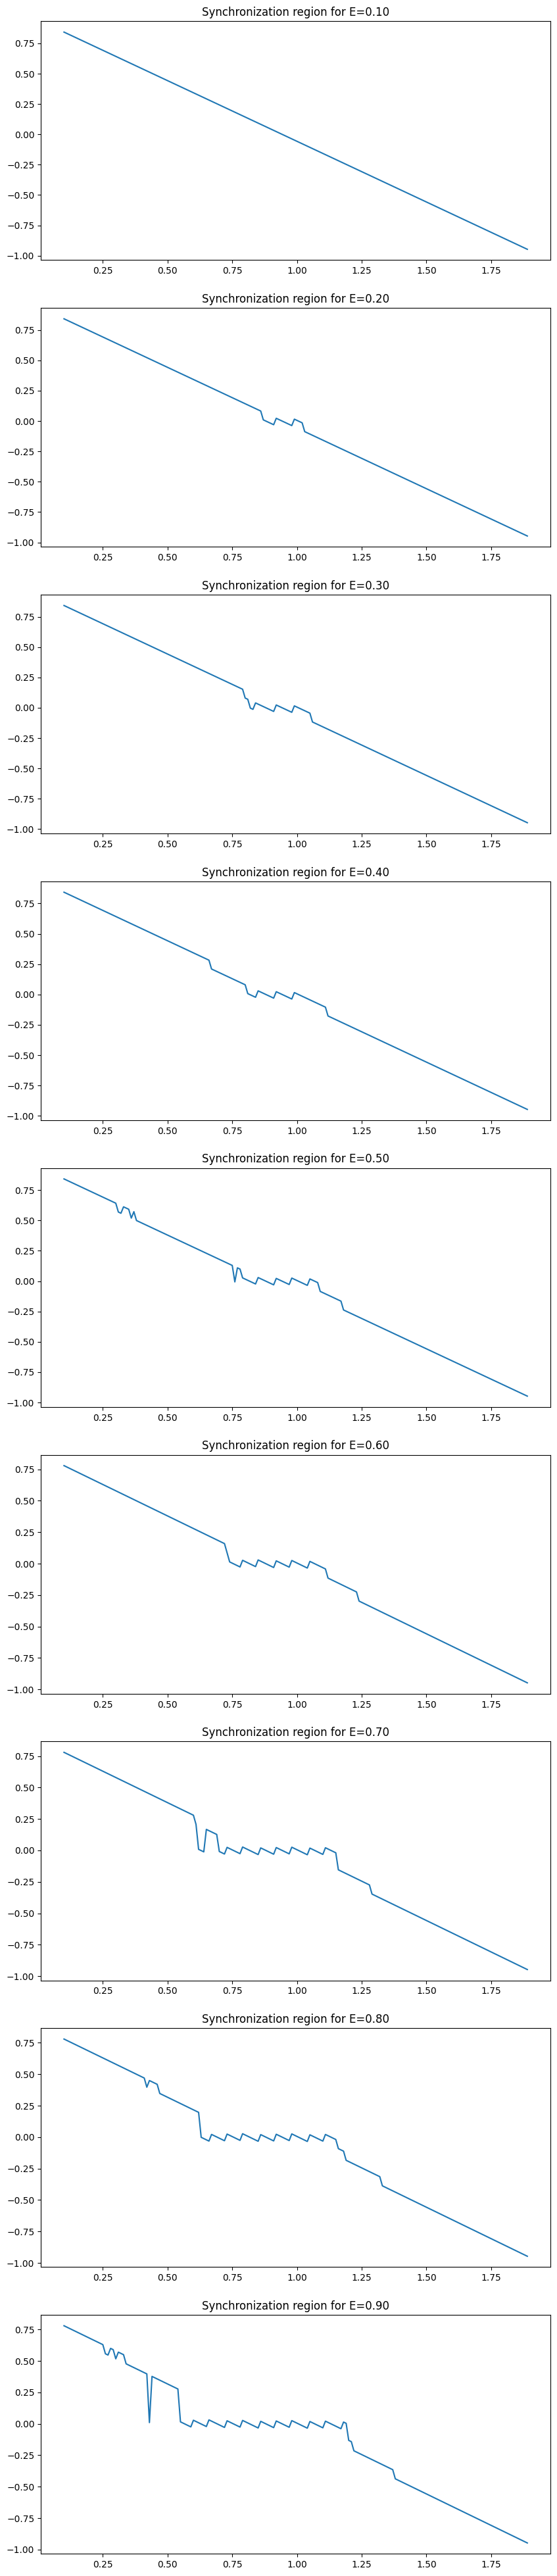

In [5]:
# Task 2 - Plotting Synchronization Regions

fig, ax = plt.subplots(len(E_values), 1, figsize=(10, 50))

for j in range(len(E_values)):
    E = E_values[j]
    for i in np.arange(n):
        delta1 = delta[i]
        a, b = 0, 100
        w0 = 1  # natural frequency of the vanderpol oscillator in rad/sec
        mu = 1
        v = w0 + delta1  # frequency of the external periodic force in rad/sec
        t = np.arange(a, b, 0.1)
        sol = solve_ivp(vdp2, [a, b], [0, 0], t_eval=t)
        sig1 = sol.y[0]
        N1 = len(sig1)
        T = 0.1
        fft1 = scipy.fft.fft(sig1)
        fftx1 = (2/N1) * np.abs(fft1[0:N1//2])
        freq1 = scipy.fft.fftfreq(N1, T)[:N1//2]
        ind1 = np.where(fftx1 == max(fftx1))[0][0]
        finfreq1 = 2*np.pi*freq1[ind1]  # frequency of the vanderpol oscillator in coupled state in rad/sec
        freq_diff = finfreq1 - v
        Vs[i] = v
        freqdiff[i] = freq_diff
    E_num = "{:.2f}".format(E)
    ax[j].plot(Vs, freqdiff)
    ax[j].set_title(f'Synchronization region for E={E_num}')
plt.show()

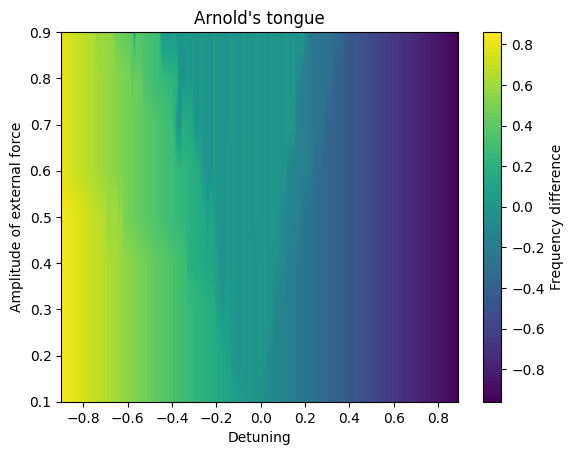

In [6]:
# Task 2 - Arnold Tongue

# Initialize a 2D array to store the frequency differences for each combination of E and delta
freqdiff_2d = np.zeros((len(E_values), n))

for j, E in enumerate(E_values):
    for i in np.arange(n):
        delta1 = delta[i]
        a, b = 0, 100
        w0 = 1  # natural frequency of the vanderpol oscillator in rad/sec
        mu = 1
        v = w0 + delta1  # frequency of the external periodic force in rad/sec
        t = np.arange(a, b, 0.1)
        sol = solve_ivp(vdp2, [a, b], [0, 0], t_eval=t)
        sig1 = sol.y[0]
        N1 = len(sig1)
        T = 0.1
        fft1 = scipy.fft.fft(sig1)
        fftx1 = (2/N1) * np.abs(fft1[0:N1//2])
        freq1 = scipy.fft.fftfreq(N1, T)[:N1//2]
        ind1 = np.where(fftx1 == max(fftx1))[0][0]
        finfreq1 = 2*np.pi*freq1[ind1]  # frequency of the vanderpol oscillator in coupled state in rad/sec
        freq_diff = finfreq1 - v
        Vs[i] = v
        freqdiff[i] = freq_diff
        freqratio[i] = finfreq1 / v
    freqdiff_2d[j] = freqdiff

# Plot the Arnold's tongue
plt.figure()
plt.contourf(delta, E_values, freqdiff_2d, levels=100)
plt.colorbar(label='Frequency difference')
plt.xlabel('Detuning')
plt.ylabel('Amplitude of external force')
plt.title("Arnold's tongue")
plt.show()